In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics

#Import the different models you want to use (Note: these are for regression problems)
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Lasso

from sklearn.model_selection import cross_val_score

In [ ]:
import pandas as pd

In [ ]:


# Try reading the file with the openpyxl engine
try:
    df = pd.read_excel('/content/customer.xlsx', engine='openpyxl')
    print("File read successfully")
except Exception as e:
    print(f"Error reading the file: {e}")


File read successfully


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


In [ ]:
# getting some information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
num_features = ['Quantity', 'UnitPrice', 'CustomerID']

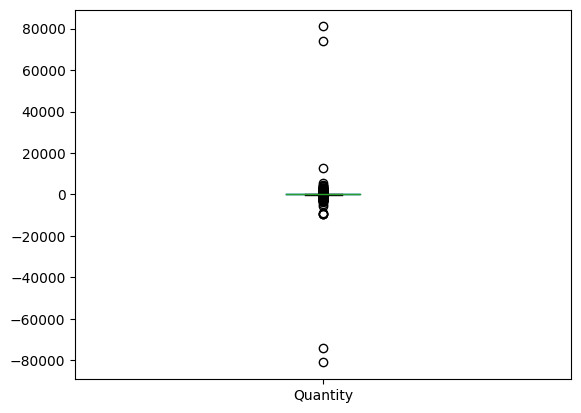

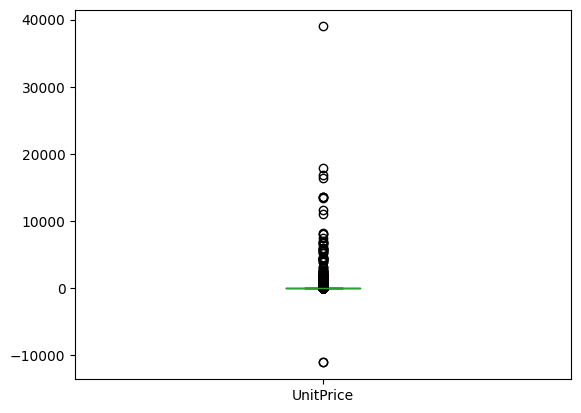

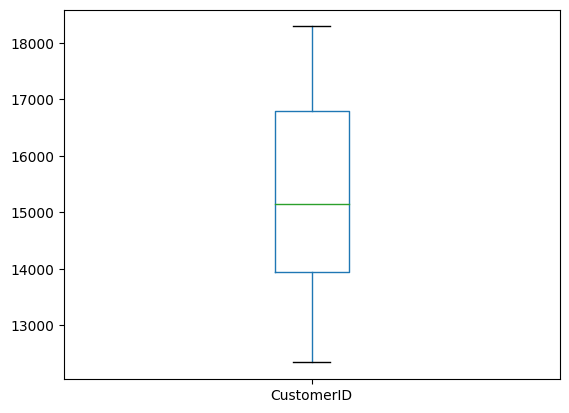

In [ ]:
#PLOT THE OUTLIERS

def plot_boxplot(df, ft):
  df.boxplot(column=[ft])
  plt.grid(False)
  plt.show()

for feat in num_features:
  plot_boxplot(df, feat)
  print("\n\n")

In [ ]:
#Create a function that returns a list containing all the index of outliers based on interquatile range
def outliers(df, ft):
  Q1 = df[ft].quantile(0.25)
  Q3 = df[ft].quantile(0.75)
  IQR = Q3 - Q1

  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  index_list = df.index[ (df[ft] < lower_bound) | (df[ft] > upper_bound) ]

  return index_list

# #Create an empty list to store the output indices from multiple columns
index_lists = []
for feature in num_features:
  index_list = outliers(df, feature)
  if len(index_list)>0:
    index_lists.extend(index_list)

index_lists = sorted(set(index_lists))
data = df.drop(index_lists)

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,444108.000000,444108,444108.000000,327498.000000
mean,4.803066,2011-07-05 17:13:44.930287104,2.694544,15345.003670
min,-12.000000,2010-12-01 08:26:00,0.000000,12347.000000
25%,1.000000,2011-03-28 14:43:00,1.250000,14041.000000
50%,3.000000,2011-07-20 16:12:00,2.080000,15287.000000
75%,8.000000,2011-10-20 13:24:00,3.750000,16843.000000
max,23.000000,2011-12-09 12:50:00,8.330000,18287.000000
std,4.616762,NaN,1.930320,1704.517156


In [ ]:
data.isna().sum()

InvoiceNo           0
StockCode           0
Description       802
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     116610
Country             0
dtype: int64

In [ ]:
# Specify the column for which you want to calculate the mean
column_name = 'CustomerID'

# Calculate the mean of the specified column
mean_value = data[column_name].mean()

In [ ]:
mean_value

15345.00367025142

In [ ]:
# Specify the column for which you want to replace missing values
column_name = 'CustomerID'

# Calculate the mean of the specified column
mean_value = data[column_name].mean()

# Replace missing values in the specified column with the mean value
data[column_name].fillna(mean_value, inplace=True)

print("DataFrame with missing values replaced by mean:")
print(data)

DataFrame with missing values replaced by mean:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate 

In [ ]:
data.isna().sum()

InvoiceNo        0
StockCode        0
Description    802
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID       0
Country          0
dtype: int64

In [ ]:
data.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,444108.000000,444108,444108.000000,444108.000000
mean,4.803066,2011-07-05 17:13:44.930287104,2.694544,15345.003670
min,-12.000000,2010-12-01 08:26:00,0.000000,12347.000000
25%,1.000000,2011-03-28 14:43:00,1.250000,14472.000000
50%,3.000000,2011-07-20 16:12:00,2.080000,15345.003670
75%,8.000000,2011-10-20 13:24:00,3.750000,16316.000000
max,23.000000,2011-12-09 12:50:00,8.330000,18287.000000
std,4.616762,NaN,1.930320,1463.730864


In [ ]:
# Specify the column for which you want to drop rows with missing values
column_name = 'Description'

# Drop rows with missing values in the specified column
data.dropna(subset=[column_name], inplace=True)

print("DataFrame with rows containing missing values in 'column1' dropped:")
print(df)

DataFrame with rows containing missing values in 'column1' dropped:
       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

       

In [ ]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
data.head(50)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom


<ipython-input-92-d5e70cc1f85f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Quantity'])


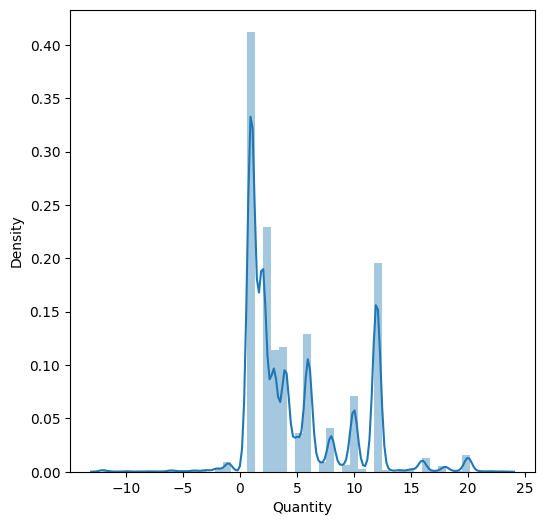

In [ ]:
# Item_Weight distribution
plt.figure(figsize=(6,6))
sns.distplot(data['Quantity'])
plt.show();


<ipython-input-93-c4568563cf65>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['UnitPrice'])


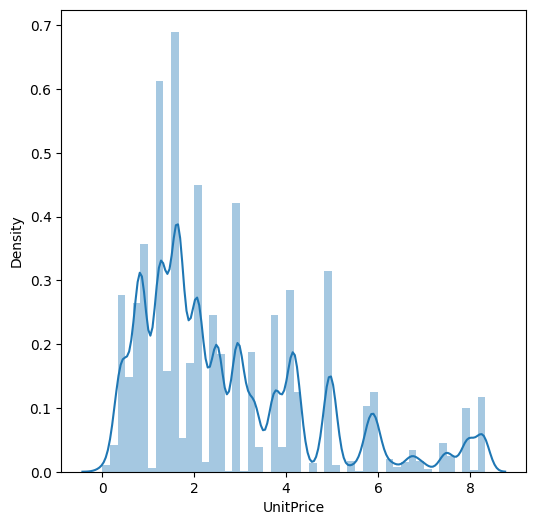

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(data['UnitPrice'])
plt.show();

<ipython-input-94-b77030df15bc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['CustomerID'])


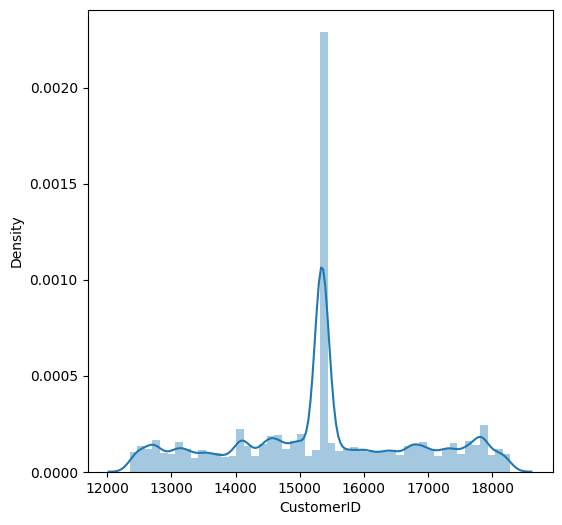

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(data['CustomerID'])
plt.show();

In [ ]:
#Check the category distribution
data['Country'].value_counts()

Country
United Kingdom          411530
Germany                   7025
France                    6371
EIRE                      5650
Spain                     1915
Belgium                   1539
Switzerland               1379
Portugal                  1233
Norway                     661
Italy                      618
Channel Islands            532
Australia                  531
Netherlands                507
Cyprus                     484
Finland                    468
Unspecified                365
Austria                    318
Poland                     247
USA                        216
Denmark                    211
Sweden                     202
Israel                     188
Hong Kong                  172
Iceland                    141
Singapore                  123
Greece                     116
Japan                      115
Canada                     102
Malta                       96
RSA                         49
United Arab Emirates        49
European Community          46


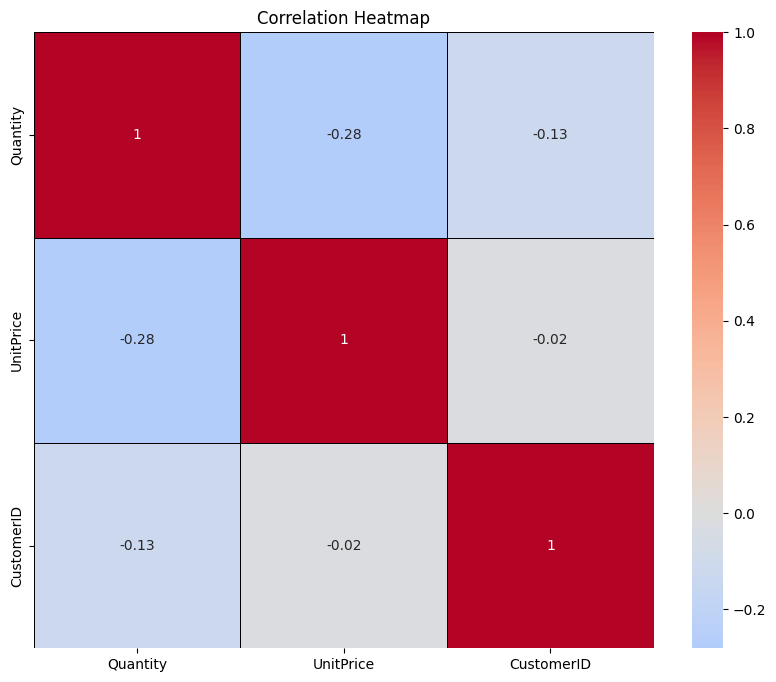

In [ ]:
# Calculate the correlation matrix
corr_matrix = data[num_features].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, linewidths=0.5, linecolor='black')

# Set the title for better context
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [ ]:
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
del data['']

del data['CustomerID']


In [ ]:
data.head()

,Description,Quantity,InvoiceDate,UnitPrice,Country
0,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,United Kingdom
1,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,United Kingdom
2,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,United Kingdom
3,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,United Kingdom
4,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,United Kingdom


In [ ]:
label_encoder = LabelEncoder() #Only use this for Labels/ target not features
data['Country'] = label_encoder.fit_transform(data['Country'])
data['Description']= label_encoder.fit_transform(data['Description'])





In [ ]:
data.head(20)

,Description,Quantity,InvoiceDate,UnitPrice,Country
0,3635,6,2010-12-01 08:26:00,2.55,36
1,3643,6,2010-12-01 08:26:00,3.39,36
2,824,8,2010-12-01 08:26:00,2.75,36
3,1754,6,2010-12-01 08:26:00,3.39,36
4,2685,6,2010-12-01 08:26:00,3.39,36
5,2922,2,2010-12-01 08:26:00,7.65,36
6,1391,6,2010-12-01 08:26:00,4.25,36
7,1511,6,2010-12-01 08:28:00,1.85,36
8,1508,6,2010-12-01 08:28:00,1.85,36
10,2523,6,2010-12-01 08:34:00,2.10,36


In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


In [ ]:
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day


In [ ]:
data.head()

,Description,Quantity,InvoiceDate,UnitPrice,Country,Year,Month,Day
0,3635,6,2010-12-01 08:26:00,2.55,36,2010,12,1
1,3643,6,2010-12-01 08:26:00,3.39,36,2010,12,1
2,824,8,2010-12-01 08:26:00,2.75,36,2010,12,1
3,1754,6,2010-12-01 08:26:00,3.39,36,2010,12,1
4,2685,6,2010-12-01 08:26:00,3.39,36,2010,12,1


In [ ]:
del data['InvoiceDate']

In [ ]:
data.head()

,Description,Quantity,UnitPrice,Country,Year,Month,Day
0,3635,6,2.55,36,2010,12,1
1,3643,6,3.39,36,2010,12,1
2,824,8,2.75,36,2010,12,1
3,1754,6,3.39,36,2010,12,1
4,2685,6,3.39,36,2010,12,1


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
X= data.drop('UnitPrice', axis=1)
Y = data['UnitPrice']
model = DecisionTreeRegressor()
model.fit(X, Y)
Prediction = model.predict([[3635,6,36,2010,12,1,]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [ ]:
X

,Description,Quantity,Country,Year,Month,Day
0,3635,6,36,2010,12,1
1,3643,6,36,2010,12,1
2,824,8,36,2010,12,1
3,1754,6,36,2010,12,1
4,2685,6,36,2010,12,1
...,...,...,...,...,...,...
541904,2175,12,13,2011,12,9
541905,664,6,13,2011,12,9
541906,670,4,13,2011,12,9
541907,669,4,13,2011,12,9


In [ ]:
Y

0         2.55
1         3.39
2         2.75
3         3.39
4         3.39
          ... 
541904    0.85
541905    2.10
541906    4.15
541907    4.15
541908    4.95
Name: UnitPrice, Length: 443306, dtype: float64

In [ ]:
Prediction

array([2.72142857])

In [ ]:
# checking the accuracy of the model
#Create a 70 - 30 split of your data for the train and validation/test dataset
X_train, X_val_test, Y_train, Y_val_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#Split the Validatio/test into validation and test on a ratio of 70:30
X_val, X_test, Y_val, Y_test = train_test_split(X_val_test, Y_val_test, test_size=0.3, random_state=0)

X_train.shape, Y_train.shape, X_val.shape, Y_val.shape, X_test.shape, Y_test.shape


((310314, 6), (310314,), (93094, 6), (93094,), (39898, 6), (39898,))

In [ ]:
#Create a dictionary to store the names of the model and the actual model definition (or creation)
models = {'random forest':RandomForestRegressor(random_state=42),
          'gradient boosting': GradientBoostingRegressor(),
          'XGB':XGBRegressor(),
          'support vector': SVR(),
          'lasso regression': Lasso()}

In [ ]:
#Define a function to check the performace of different models
def train_val_models(dict_, X_train,Y_train, X_val, Y_val, X_test, Y_test):

  train_scores = [] #A list to store all the training evaluation scores
  val_scores = [] #A list to store all the validation evaluation scores
  test_scores = [] #A list to store all the test evaluation scores

  for name, model in dict_.items():
    model.fit( X_train, Y_train )
    Y_train_pred = model.predict(X_train)
    Y_val_pred = model.predict(X_val)
    Y_test_pred = model.predict(X_test)
    train_score = metrics.r2_score(Y_train, Y_train_pred)
    val_score = metrics.r2_score(Y_val, Y_val_pred)
    test_score = metrics.r2_score(Y_test, Y_test_pred)
    train_scores.append(train_score)
    val_scores.append(val_score)
    test_scores.append(test_score)


  score_df = pd.DataFrame([train_scores,val_scores,test_scores], columns = list(dict_.keys())).transpose()
  score_df.rename(columns = {0:'Train', 1:'Valid', 2:'Test'}, inplace = True)

  return score_df

In [ ]:
score_df = train_val_models(models, X_train,Y_train, X_val, Y_val, X_test, Y_test)
score_df

In [ ]:
#Trying to use cross validation
#Define a function to check the performace of different models
def cross_val_models(model_dict, X, Y):

  cv_scores = [] #A list to store the mean performance of each model

  for name, model in model_dict.items():
    cv_score = cross_val_score(model, X, Y, cv=10, scoring='r2').mean()
    cv_scores.append(cv_score)

  score_df = pd.DataFrame([cv_scores], columns = list(model_dict.keys())).transpose()
  score_df.rename(columns = {0:'CV_Score'}, inplace = True)

  return score_df

In [ ]:
score_df = cross_val_models(models, X, Y)
score_df